# IMPORT LIBRARY 

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *

2024-04-03 01:37:01.300546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 01:37:01.300646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 01:37:01.463343: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# READ DATA 

In [142]:
df = pd.read_csv("/kaggle/input/tsla-dataset/tsla.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [143]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [145]:
df.shape

(1858, 7)

In [146]:
df.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

# SPLIT DATA INTO TRAIN & TEST 

In [147]:
train_size = int(len(df) * 0.8) 
train_size

1486

In [148]:
train = df[0: train_size] 
train.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [149]:
train.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1481,2016-05-17,209.05,209.82,204.02,204.66,2303002,0
1482,2016-05-18,209.15,215.31,207.75,211.17,4454848,0
1483,2016-05-19,213.62,216.79,207.30,215.21,6582419,0
1484,2016-05-20,216.99,220.55,216.35,220.28,8635216,0
1485,2016-05-23,219.87,222.60,215.86,216.22,4335487,0


In [150]:
data_length = len(df)
data_length

1858

In [151]:
test = df[train_size : data_length]  
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [152]:
test.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


# SCALING DATA 

In [153]:
scaler = MinMaxScaler()

In [154]:
train = train.loc[: ,['Open']].values
train

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [155]:
test_array = test.loc[: ,['Open']].values
test_array

array([[216.6  ],
       [217.91 ],
       [220.5  ],
       [224.99 ],
       [223.04 ],
       [221.48 ],
       [219.59 ],
       [220.   ],
       [218.   ],
       [222.24 ],
       [233.8  ],
       [234.98 ],
       [227.39 ],
       [219.5  ],
       [218.88 ],
       [216.95 ],
       [217.42 ],
       [217.81 ],
       [219.5  ],
       [220.68 ],
       [199.47 ],
       [195.69 ],
       [190.05 ],
       [190.86 ],
       [201.89 ],
       [205.13 ],
       [212.97 ],
       [206.14 ],
       [209.73 ],
       [210.   ],
       [213.1  ],
       [217.8  ],
       [219.96 ],
       [224.1  ],
       [225.5  ],
       [223.12 ],
       [222.52 ],
       [219.64 ],
       [225.   ],
       [226.47 ],
       [226.   ],
       [221.99 ],
       [222.27 ],
       [227.69 ],
       [229.34 ],
       [227.95 ],
       [230.7  ],
       [235.5  ],
       [229.37 ],
       [227.37 ],
       [225.69 ],
       [230.   ],
       [228.   ],
       [226.82 ],
       [228.24 ],
       [22

In [156]:
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [157]:
test_scaled = scaler.transform(test_array)
test_scaled

array([[0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.7507826 ],
       [0.74341693],
       [0.75903215],
       [0.80160572],
       [0.80595146],
       [0.77799875],
       [0.74894119],
       [0.74665783],
       [0.73954996],
       [0.74128089],
       [0.7427172 ],
       [0.74894119],
       [0.75328693],
       [0.67517401],
       [0.6612529 ],
       [0.64048171],
       [0.64346481],
       [0.68408647],
       [0.69601886],
       [0.72489228],
       [0.69973852],
       [0.71295989],
       [0.71395426],
       [0.72537105],
       [0.74268037],
       [0.75063529],
       [0.76588222],
       [0.77103819],
       [0.76227305],
       [0.76006334],
       [0.74945678],
       [0.76919677],
       [0.77461054],
       [0.77287961],
       [0.75811144],
       [0.75914264],
       [0.7791036 ],
       [0.78518027],
       [0.78006114],
       [0.79018893],
       [0.807

In [158]:
length = len(train_scaled)
length

1486

In [159]:
time_step = 40
x_train = []
y_train = []

In [160]:
for i in range(time_step, length):
    x_train.append(train_scaled[i - time_step:i, 0])
    y_train.append(train_scaled[i, 0])

In [161]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [162]:
x_train.shape

(1446, 40)

In [163]:
y_train.shape

(1446,)

In [164]:
x_train.shape[1]

40

In [168]:
x_train=np.reshape (x_train ,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1446, 40, 1)

# BUILD RNN MODEL 

In [169]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(50,activation='tanh',return_sequences=True,
                       input_shape=(x_train.shape[1],1)))

rnn_model.add(Dropout(0.3))


rnn_model.add(SimpleRNN(50,activation='tanh',return_sequences=True))
                       
rnn_model.add(Dropout(0.3))

rnn_model.add(SimpleRNN(50,activation='tanh',return_sequences=True))
                       
rnn_model.add(Dropout(0.3))

rnn_model.add(SimpleRNN(50))
rnn_model.add(Dropout(0.3))


rnn_model.add(Dense(1))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# COMPILE MODEL

In [170]:
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

# FIT MODEL 

In [171]:
rnn_model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
 6/46 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2818

I0000 00:00:1712109692.607297      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - loss: 0.7953
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3534
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2436
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1575
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1221
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0997
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0848
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0652
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0603
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0554


# MODEL TEST 

In [172]:
total_data = pd.concat((df['Open'], test['Open']), axis = 0)
total_data.head()

0    17.00
1    19.00
2    25.79
3    25.00
4    23.00
Name: Open, dtype: float64

In [173]:
len(total_data)

2230

In [174]:
inputs = total_data[len(total_data) - len(test) - time_step: ].values.reshape(-1,1)

In [175]:
inputs = scaler.transform(inputs)

In [176]:
inputs.shape

(412, 1)

In [177]:
x_test = []
for i in range(time_step, 402):
    x_test.append(inputs[i - time_step:i -0])

In [178]:
x_test = np.array(x_test)
x_test.shape

(362, 40, 1)

In [179]:
rnn_pred = rnn_model.predict(x_test)
rnn_pred = scaler.inverse_transform(rnn_pred)
rnn_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


array([[344.183  ],
       [338.5776 ],
       [326.3861 ],
       [314.57294],
       [303.85443],
       [300.80087],
       [294.40213],
       [288.66318],
       [289.52878],
       [290.39603],
       [290.31366],
       [294.57986],
       [294.995  ],
       [293.49557],
       [292.62036],
       [287.62732],
       [286.7689 ],
       [290.5361 ],
       [293.39197],
       [286.47467],
       [282.71844],
       [287.87427],
       [286.68875],
       [269.06775],
       [264.59564],
       [264.1123 ],
       [257.8865 ],
       [258.06107],
       [263.40375],
       [268.9497 ],
       [276.69775],
       [267.4723 ],
       [266.19354],
       [270.5013 ],
       [280.3569 ],
       [279.55795],
       [282.40326],
       [289.12103],
       [283.86597],
       [289.90186],
       [294.7842 ],
       [296.44803],
       [297.05383],
       [294.82022],
       [293.98343],
       [294.31467],
       [295.36578],
       [297.2534 ],
       [299.1015 ],
       [300.83908],


# VUSLIZATION 

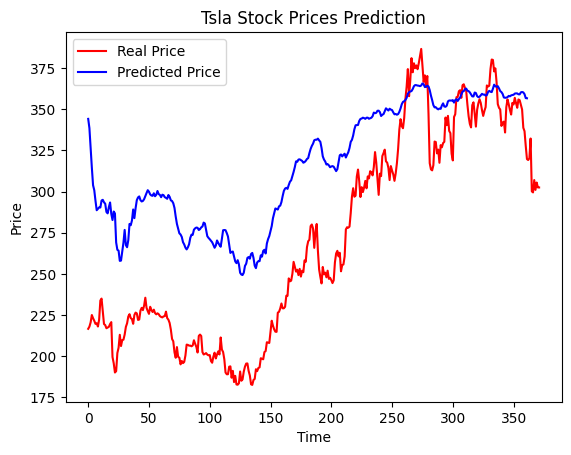

In [180]:
plt.plot(test_array, color = 'red', label = 'Real Price')
plt.plot(rnn_pred, color = 'blue', label = 'Predicted Price')
plt.title("Tsla Stock Prices Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# LSTM MODEL

In [181]:
lstm_model = Sequential()

lstm_model.add(LSTM(50, activation = 'tanh', return_sequences = True, 
                       input_shape = (x_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50,  return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50, return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [182]:
lstm_model.compile(optimizer = 'adam', loss = 'MSE')
lstm_model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0950
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0077
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0059
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0048
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0047
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0038
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0037
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0033
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0036
Epoc

In [183]:
lstm_pred = lstm_model.predict(x_test)
lstm_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


array([[0.99759245],
       [0.98706627],
       [0.9711861 ],
       [0.94907427],
       [0.9217321 ],
       [0.8910199 ],
       [0.85910016],
       [0.8280311 ],
       [0.7996434 ],
       [0.7752848 ],
       [0.75602514],
       [0.74300927],
       [0.73685133],
       [0.73702747],
       [0.74201447],
       [0.74997574],
       [0.75908935],
       [0.7679318 ],
       [0.775562  ],
       [0.7816034 ],
       [0.7860436 ],
       [0.7880022 ],
       [0.7867126 ],
       [0.78167325],
       [0.7730635 ],
       [0.7620865 ],
       [0.7502961 ],
       [0.73949003],
       [0.7306888 ],
       [0.72458917],
       [0.7214207 ],
       [0.72116464],
       [0.7237431 ],
       [0.7288962 ],
       [0.73643446],
       [0.7458207 ],
       [0.75627404],
       [0.7669406 ],
       [0.7768145 ],
       [0.7854296 ],
       [0.7926042 ],
       [0.79846704],
       [0.80260605],
       [0.8050074 ],
       [0.8060672 ],
       [0.8063301 ],
       [0.8061737 ],
       [0.805

In [184]:
lstm_pred = scaler.inverse_transform(lstm_pred)

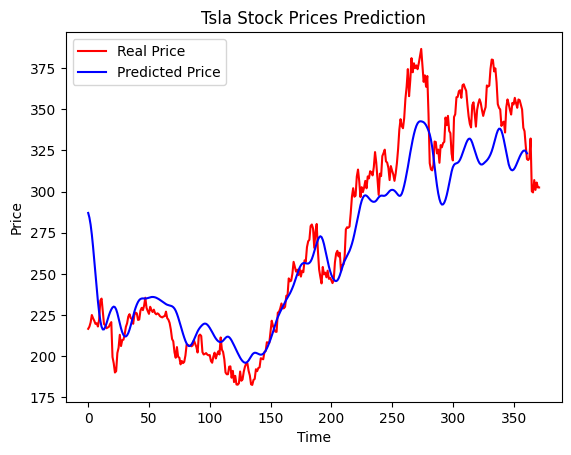

In [185]:
plt.plot(test_array, color = 'red', label = 'Real Price')
plt.plot(lstm_pred, color = 'blue', label = 'Predicted Price')
plt.title("Tsla Stock Prices Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()